### **Sentiment Analysis**

**1. Load Data**

In [1]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
df = pd.read_csv('/content/IMDB-Dataset.csv')

#Remove duplicate rows
df = df.drop_duplicates()

**2. Preprocessing**

In [7]:
# khong hieu loi trong cau lenh nao ma chay khong duoc ????
import re
import string
import nltk
nltk.download('stopwords')
#nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    # Expanding chatwords and contracts clearing contractions
    text = expand_contractions(text)
    emoji_clean = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)
    # add space after full stop
    text = re.sub(r"\.(?=\S)", ". ", text)
    # remove urls
    text = re.sub(r"http\S+", "", text)
    # remove puntuation and make text lowercase
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # lemmatize
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])
    return text

#df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
# code cua TA
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):

    wl = WordNetLemmatizer()

    soup = BeautifulSoup(text, "html.parser") # Removing html tags
    text = soup.get_text()
    text = expand_contractions(text) # Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ]) #remove punctuation and make text lowercase
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [10]:
preprocess_text(df['review'][0])

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watc

In [11]:
df['review'] = df['review'].apply(preprocess_text)

<ipython-input-8-fe02c59e251c>:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser") # Removing html tags


**3. Analysis Data**

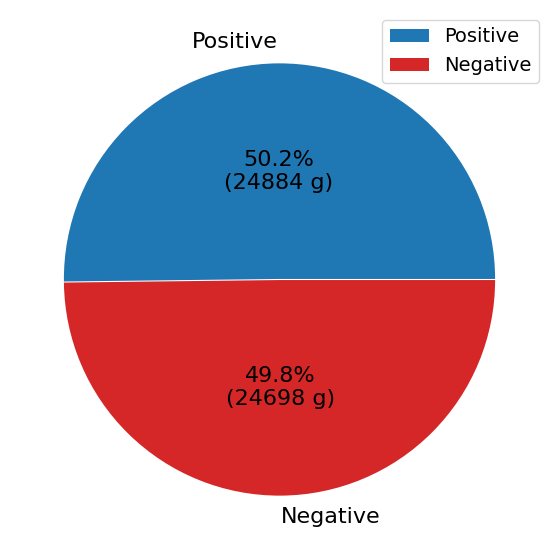

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['Positive', 'Negative']

# Creating pie chatrt
pie, ax = plt.subplots(figsize =(11, 7))
plt.pie(data, labels = labels, autopct = lambda pct: func(pct, data),
        explode=[0.0025]*2,pctdistance=0.5, colors =[sns.color_palette()[0], 'tab:red'],textprops ={'fontsize':16})
labels = [r'Positive',r'Negative']
plt.legend(labels, loc ="best", prop ={"size":14})
pie.savefig('pie.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


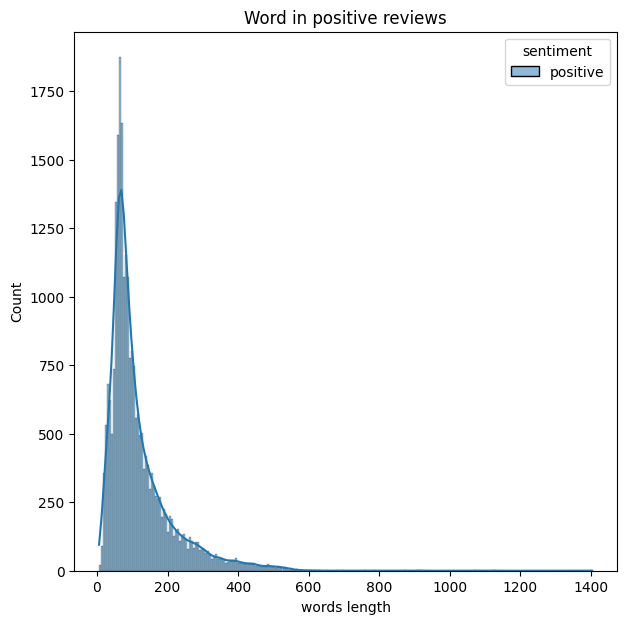

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


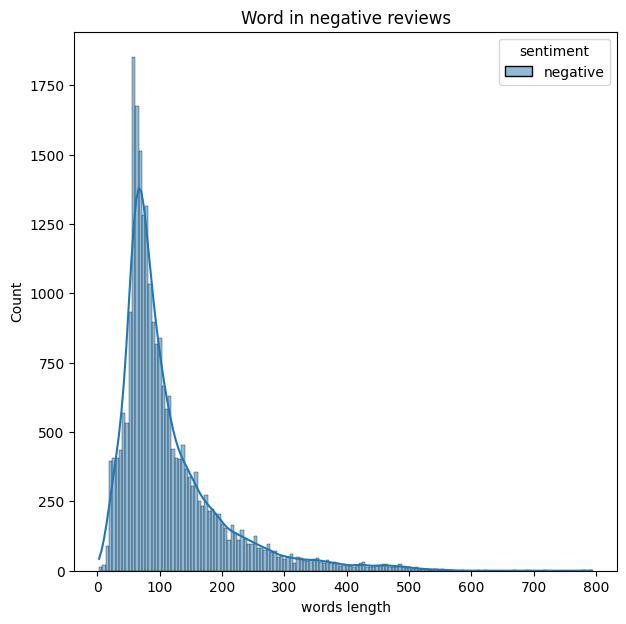

In [13]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

plt.figure(figsize=(7, 7))
hist_positive = sns.histplot(data=df_temp[df_temp['sentiment']=='positive'],x = 'words length', hue ="sentiment", kde = True).set(title ='Word in positive reviews')
plt.savefig('hist_positive.png')
plt.show(hist_positive)
plt.figure(figsize=(7, 7))
hist_negative = sns.histplot(data = df_temp[df_temp['sentiment']=='negative'],x = 'words length', hue ="sentiment", kde = True).set(title ='Word in negative reviews')
plt.savefig('hist_negative.png')
plt.show(hist_negative)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


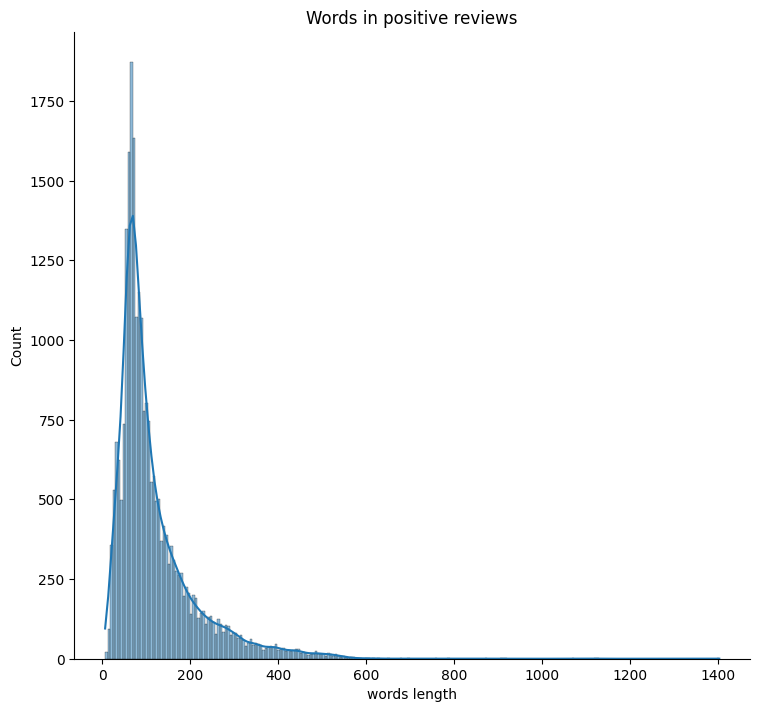

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


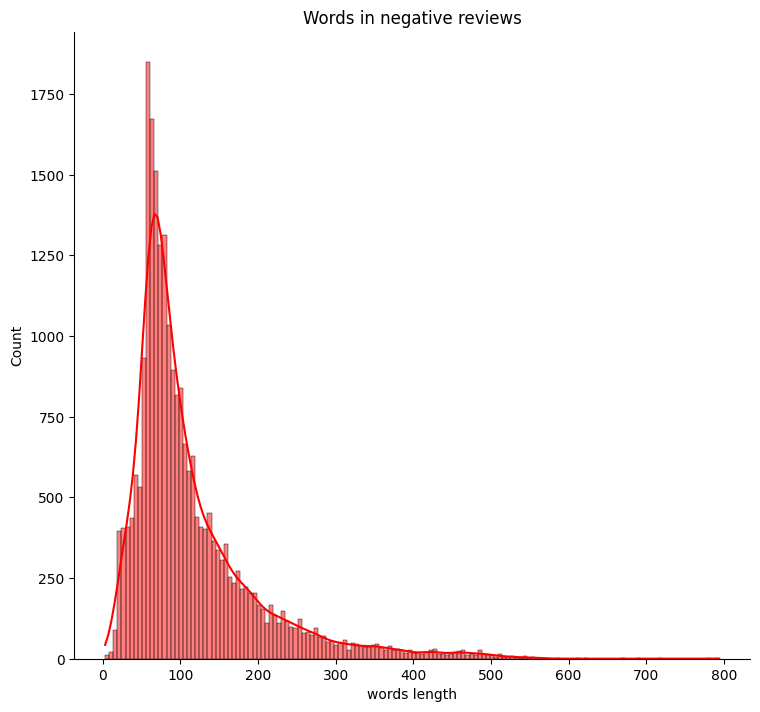

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


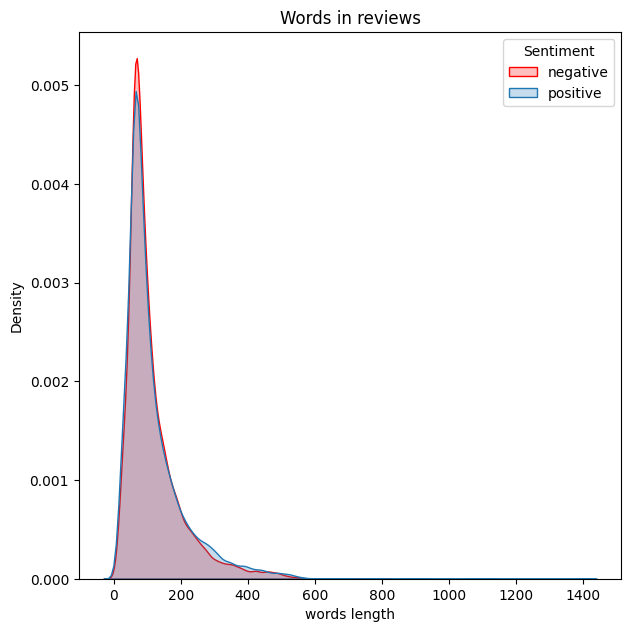

In [14]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(data=df_temp[df_temp['sentiment'] == 'positive'],x="words length", hue="sentiment", kde=True, height=7, aspect=1.1,
                            legend=False).set(title='Words in positive reviews')
plt.show(hist_positive)
hist_negative = sns.displot(data=df_temp[df_temp['sentiment'] == 'negative'],x="words length", hue="sentiment", kde=True, height=7, aspect=1.1,
                            legend=False, palette=['red']).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distibution_number_words_plot = sns.kdeplot(data=df_temp, x="words length",
                    hue="sentiment", fill=True, palette=[sns.color_palette()[0],'red']
                    ).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)


**4. Split train and test**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
x_data = df['review']
y_data = label_encode.fit_transform(df['sentiment'])
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)



**5. Vectorizer**

In [16]:
#tfidf_vectorizer = TfidfVectorizer(max_features=10000)
#tfidf_vectorizer.fit(x_train,y_train)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

**6. Classifier**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


**6.1. Decision Tree**

In [18]:

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7180598971463145


In [19]:
dt_classifier = DecisionTreeClassifier(max_depth=5,criterion='entropy', random_state=42)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.6779267923767268


**6.2. Random Forest**

In [21]:
rf_classifier = RandomForestClassifier(
    n_estimators=100, max_depth=5, max_features='sqrt', bootstrap=True, random_state=42) # max_feature = sqrt số lượng đặc trưng tại mỗi nút khi chia tách dữ liệu bằng căn bậc 2 của tổng số feature
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8030654431783806


In [22]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8420893415347384


**6.3. AdaBoost**

In [25]:
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(x_train_encoded, y_train)
y_pred = ada_classifier.predict(x_test_encoded)
ada_accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", ada_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7930825854593123


**6.4. Gradient Boosting**

In [28]:
gr_classifier = GradientBoostingClassifier(random_state=42)
gr_classifier.fit(x_train_encoded, y_train)
y_pred = gr_classifier.predict(x_test_encoded)
gr_accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", gr_accuracy)

Gradient Boosting Accuracy: 0.7968135524856307
